In [35]:
from pathlib import Path
import pandas as pd
import numpy as np
import arrow                            # Please install Arrow to be able to run some of the cells - it makes working with dates a lot easier

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

plt.style.use('ggplot')

### Companies Chosen and Ticker

| Company                                | Ticker |
|----------------------------------------|--------|
| Meta Platforms (formerly Facebook)     | $META  |
| Amazon.com                             | $AMZN  |
| Apple, Inc.                            | $AAPL  |
| Netflix, Inc.                          | $NFLX  |
| Alphabet (Google)                      | $GOOGL |
| Microsoft                              | $MSFT  |
| Tesla                                  | $TSLA  |


In [2]:
# Configuring Input and Output File Paths
# pathlib is part of Python standard library, will not require installation
input_dataset_path = Path().absolute() / "Datasets"
output_dataset_path = Path().absolute() / "Output"

In [3]:
# Function to read dataframes

def read_data(filepath: Path) -> pd.DataFrame:

    return pd.read_csv(filepath)

## Reading Available Datasets

In [4]:
# Reading in Layoffs Data

# 1 - Reading in U.S. Employees Layoff Data (as obtained via publicly available WARN Act Records)
layoffs_america = read_data(input_dataset_path/"External-Data"/"Layoffs-FAANG-WARN.csv")

# 2 - Reading in Overall Layoffs Data (as obtained from layoffs.fyi)
layoffs_overall = read_data(input_dataset_path/"External-Data"/"Layoffs-FAANG-FYI.csv")

# 3 - Reading in Federal Interest Rate Data
fed_rates = read_data(input_dataset_path/"External-Data"/"Federal-Interest-Rates.csv")

In [5]:
# Reading in COMPUSTAT Data sourced from WRDS

# 1 - Reading in Daily Security Data 
funda_daily = read_data(input_dataset_path/"Compustat"/"Daily-FAANG-WRDS.csv")

# 2 - Reading in Quarterly Data
funda_quarterly = read_data(input_dataset_path/"Compustat"/"Quarterly-FAANG-WRDS.csv")

# 3 - Reading in Annual Data
funda_annual = read_data(input_dataset_path/"Compustat"/"Annual-FAANG-WRDS.csv")

/var/folders/z6/mhv044k52r38pf74f9w6gkjc0000gn/T/ipykernel_68251/4190799827.py:5: DtypeWarning: Columns (6,15,18,20,21,45) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(filepath)


## Previewing Datasets

In [6]:
# Previewing Data - U.S. Employees Layoff Data

layoffs_america.head(5)

,Company Name,Ticker,Employees Laid Off,Notice Date,Layoff Date,Year
0,Apple Inc.,AAPL,52,3/28/24,5/27/24,2024
1,Apple Inc.,AAPL,35,3/28/24,5/27/24,2024
2,Apple Inc.,AAPL,49,3/28/24,5/27/24,2024
3,Apple Inc.,AAPL,58,3/28/24,5/27/24,2024
4,Apple Inc.,AAPL,15,3/28/24,5/27/24,2024


In [7]:
# Previewing Data - Overall Layoffs Data

layoffs_overall.head(5)

,Company,Ticker,Location_HQ,Industry,Date,Laid_Off_Count
0,Amazon,AMZN,Seattle,Retail,11/16/22,10000
1,Amazon,AMZN,Seattle,Retail,1/4/23,8000
2,Amazon,AMZN,Seattle,Retail,10/28/22,150
3,Amazon,AMZN,Seattle,Retail,3/20/23,9000
4,Amazon,AMZN,Seattle,Retail,7/13/23,80


In [8]:
# Previewing Data - Federal Interest Rates

fed_rates.head(5)

,DATE,FEDFUNDS
0,2019-01-01,2.40
1,2019-02-01,2.40
2,2019-03-01,2.41
3,2019-04-01,2.42
4,2019-05-01,2.39


In [9]:
# Previewing Data - Daily Security Data (from COMPUSTAT)

funda_daily.head(5)

,gvkey,iid,datadate,tic,cusip,conm,curcddv,capgn,cheqv,div,...,priusa,sic,spcindcd,spcseccd,spcsrc,state,stko,weburl,dldte,ipodate
0,1690,1,2019-11-01,AAPL,037833100,APPLE INC,NaN,NaN,NaN,NaN,...,1,3663,190.0,940.0,A+,CA,0,www.apple.com,NaN,1980-12-12
1,1690,1,2019-11-04,AAPL,037833100,APPLE INC,NaN,NaN,NaN,NaN,...,1,3663,190.0,940.0,A+,CA,0,www.apple.com,NaN,1980-12-12
2,1690,1,2019-11-05,AAPL,037833100,APPLE INC,NaN,NaN,NaN,NaN,...,1,3663,190.0,940.0,A+,CA,0,www.apple.com,NaN,1980-12-12
3,1690,1,2019-11-06,AAPL,037833100,APPLE INC,NaN,NaN,NaN,NaN,...,1,3663,190.0,940.0,A+,CA,0,www.apple.com,NaN,1980-12-12
4,1690,1,2019-11-07,AAPL,037833100,APPLE INC,USD,NaN,NaN,0.77,...,1,3663,190.0,940.0,A+,CA,0,www.apple.com,NaN,1980-12-12


In [10]:
# Previewing Data - Quarterly Data (from COMPUSTAT)

funda_quarterly.head(5)

,gvkey,datadate,fyearq,fqtr,fyr,indfmt,consol,popsrc,datafmt,tic,...,priusa,sic,spcindcd,spcseccd,spcsrc,state,stko,weburl,dldte,ipodate
0,1690,2020-03-31,2020,2,9,INDL,C,D,STD,AAPL,...,1,3663,190.0,940.0,A+,CA,0,www.apple.com,NaN,1980-12-12
1,1690,2020-06-30,2020,3,9,INDL,C,D,STD,AAPL,...,1,3663,190.0,940.0,A+,CA,0,www.apple.com,NaN,1980-12-12
2,1690,2020-09-30,2020,4,9,INDL,C,D,STD,AAPL,...,1,3663,190.0,940.0,A+,CA,0,www.apple.com,NaN,1980-12-12
3,1690,2020-12-31,2021,1,9,INDL,C,D,STD,AAPL,...,1,3663,190.0,940.0,A+,CA,0,www.apple.com,NaN,1980-12-12
4,1690,2021-03-31,2021,2,9,INDL,C,D,STD,AAPL,...,1,3663,190.0,940.0,A+,CA,0,www.apple.com,NaN,1980-12-12


In [11]:
# Previewing Data - Annual Data (from COMPUSTAT)

funda_annual.head(5)

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,cusip,conm,...,priusa,sic,spcindcd,spcseccd,spcsrc,state,stko,weburl,dldte,ipodate
0,1690,2020-09-30,2020,INDL,C,D,STD,AAPL,037833100,APPLE INC,...,1,3663,190.0,940.0,A+,CA,0,www.apple.com,NaN,1980-12-12
1,1690,2021-09-30,2021,INDL,C,D,STD,AAPL,037833100,APPLE INC,...,1,3663,190.0,940.0,A+,CA,0,www.apple.com,NaN,1980-12-12
2,1690,2022-09-30,2022,INDL,C,D,STD,AAPL,037833100,APPLE INC,...,1,3663,190.0,940.0,A+,CA,0,www.apple.com,NaN,1980-12-12
3,1690,2023-09-30,2023,INDL,C,D,STD,AAPL,037833100,APPLE INC,...,1,3663,190.0,940.0,A+,CA,0,www.apple.com,NaN,1980-12-12
4,12141,2020-06-30,2020,INDL,C,D,STD,MSFT,594918104,MICROSOFT CORP,...,1,7372,185.0,940.0,A+,WA,0,www.microsoft.com,NaN,1986-03-13


## Exploratory Data Analysis

In [12]:
# Unique listing of Company - CUSIP -Ticker Information

company_cusip = funda_annual[['conm', 'cusip', 'tic']].drop_duplicates(subset = ['conm', 'cusip']).reset_index(drop = True)
company_cusip

,conm,cusip,tic
0,APPLE INC,037833100,AAPL
1,MICROSOFT CORP,594918104,MSFT
2,AMAZON.COM INC,023135106,AMZN
3,NETFLIX INC,64110L106,NFLX
4,ALPHABET INC,02079K305,GOOGL
5,META PLATFORMS INC,30303M102,META
6,TESLA INC,88160R101,TSLA


# EDA - U.S. Employees Layoffs

In [13]:
layoffs_america.head(3)

,Company Name,Ticker,Employees Laid Off,Notice Date,Layoff Date,Year
0,Apple Inc.,AAPL,52,3/28/24,5/27/24,2024
1,Apple Inc.,AAPL,35,3/28/24,5/27/24,2024
2,Apple Inc.,AAPL,49,3/28/24,5/27/24,2024


In [14]:
# Working on U.S. Employees WARN data

# Converting the Notice Date and Layoff Date columns to the proper datetime format
layoffs_america[['Notice Date', 'Layoff Date']] = layoffs_america[['Notice Date', 'Layoff Date']].apply(pd.to_datetime, format='%m/%d/%y')
layoffs_america.head(3)
# Excluding any data from before 2019
layoffs_america = layoffs_america[layoffs_america['Layoff Date'] >= '2019-01-01'].reset_index(drop = True)



In [15]:
layoffs_america_company_summary = layoffs_america[['Company Name', 'Employees Laid Off']].groupby('Company Name').sum().reset_index()
layoffs_america_company_summary

,Company Name,Employees Laid Off
0,Amazon,5384
1,Apple Inc.,1018
2,Google,2837
3,Meta,9954
4,Microsoft,1173
5,Netflix,106
6,Tesla,11801


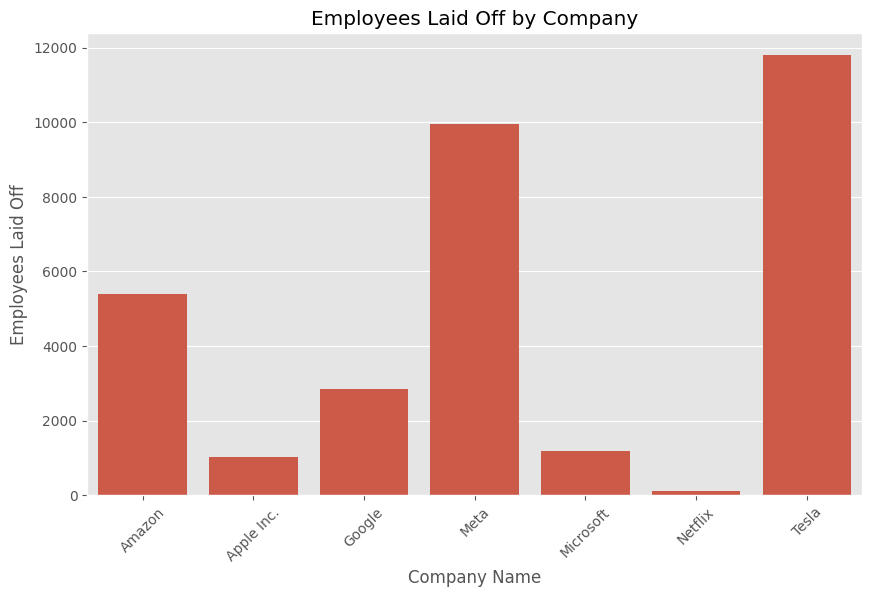

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Company Name', y='Employees Laid Off', data=layoffs_america_company_summary)

# Set plot title and labels
plt.title('Employees Laid Off by Company')
plt.xlabel('Company Name')
plt.ylabel('Employees Laid Off')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()

In [17]:
# Resampling layoffs data by quarter, summing up the employees laid off
layoffs_summary_america = layoffs_america.resample('Q', on='Notice Date')['Employees Laid Off'].sum().reset_index()
layoffs_summary_america.rename(columns={'Notice Date': 'Quarter', 'Employees Laid Off': 'Total Employees Laid Off'}, inplace=True)
layoffs_summary_america.head(10)

,Quarter,Total Employees Laid Off
0,2019-03-31,190
1,2019-06-30,0
2,2019-09-30,0
3,2019-12-31,0
4,2020-03-31,93
5,2020-06-30,11301
6,2020-09-30,0
7,2020-12-31,0
8,2021-03-31,87
9,2021-06-30,195


# EDA - Overall Layoffs 

In [18]:
layoffs_overall.head(5)

,Company,Ticker,Location_HQ,Industry,Date,Laid_Off_Count
0,Amazon,AMZN,Seattle,Retail,11/16/22,10000
1,Amazon,AMZN,Seattle,Retail,1/4/23,8000
2,Amazon,AMZN,Seattle,Retail,10/28/22,150
3,Amazon,AMZN,Seattle,Retail,3/20/23,9000
4,Amazon,AMZN,Seattle,Retail,7/13/23,80


In [19]:
# Converting the Date column to datetime format
layoffs_overall['Date'] = pd.to_datetime(layoffs_overall['Date'], format = "%m/%d/%y")

In [20]:
# layoff by company

layoffs_overall_company_summary = layoffs_overall[['Company', 'Laid_Off_Count']].groupby('Company').sum().reset_index()

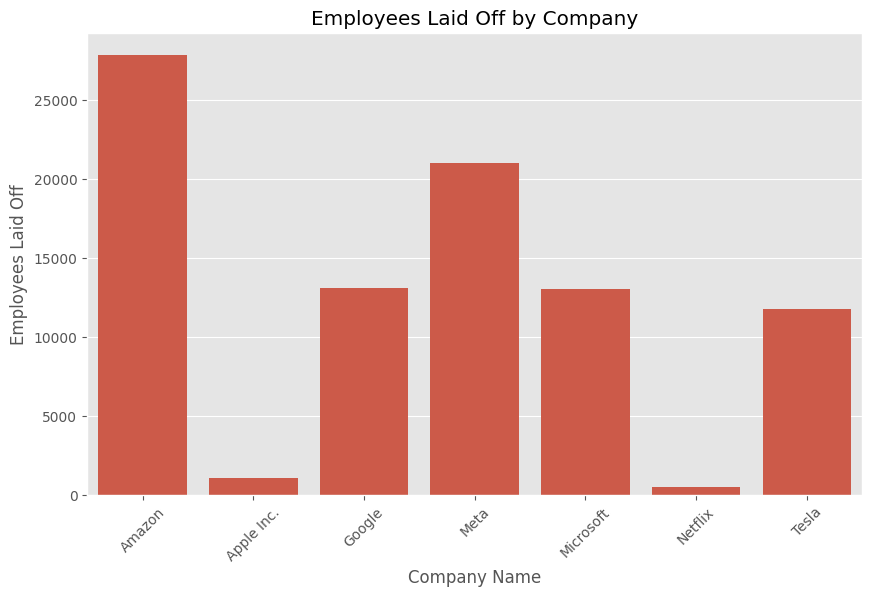

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Company', y='Laid_Off_Count', data = layoffs_overall_company_summary)

# Set plot title and labels
plt.title('Employees Laid Off by Company')
plt.xlabel('Company Name')
plt.ylabel('Employees Laid Off')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()

# EDA - Federal Interest Rates

In [22]:
# adding quarter and year to federal interest rates table
fed_rates['DATE'] = pd.to_datetime(fed_rates['DATE'])
fed_rates['Year'] = fed_rates['DATE'].apply(lambda x: arrow.get(x).year)
fed_rates['Quarter'] = fed_rates['DATE'].apply(lambda x: arrow.get(x).quarter)
fed_rates.head(10)

,DATE,FEDFUNDS,Year,Quarter
0,2019-01-01,2.40,2019,1
1,2019-02-01,2.40,2019,1
2,2019-03-01,2.41,2019,1
3,2019-04-01,2.42,2019,2
4,2019-05-01,2.39,2019,2
5,2019-06-01,2.38,2019,2
6,2019-07-01,2.40,2019,3
7,2019-08-01,2.13,2019,3
8,2019-09-01,2.04,2019,3
9,2019-10-01,1.83,2019,4


In [23]:
# Resample fed_rates data by quarter, taking the mean of the federal interest rate
fed_rates_summary = fed_rates.resample('Q', on='DATE')['FEDFUNDS'].mean().reset_index()
fed_rates_summary.rename(columns={'DATE': 'Quarter', 'FEDFUNDS': 'Average Fed Funds Rate'}, inplace=True)
fed_rates_summary

,Quarter,Average Fed Funds Rate
0,2019-03-31,2.403333
1,2019-06-30,2.396667
2,2019-09-30,2.190000
3,2019-12-31,1.643333
4,2020-03-31,1.260000
5,2020-06-30,0.060000
6,2020-09-30,0.093333
7,2020-12-31,0.090000
8,2021-03-31,0.080000
9,2021-06-30,0.070000


In [24]:
# Maximum - Minimum - Average Interest Rate
print(f"The maximum federal interest rate recorded from 2019 to 2024 is: {fed_rates['FEDFUNDS'].max():.2f}%")
print(f"The minimum federal interest rate recorded from 2019 to 2024 is: {fed_rates['FEDFUNDS'].min():.2f}%")
print(f"The average federal interest rate recorded from 2019 to 2024 is: {fed_rates['FEDFUNDS'].mean():.2f}%")

The maximum federal interest rate recorded from 2019 to 2024 is: 5.33%
The minimum federal interest rate recorded from 2019 to 2024 is: 0.05%
The average federal interest rate recorded from 2019 to 2024 is: 2.03%


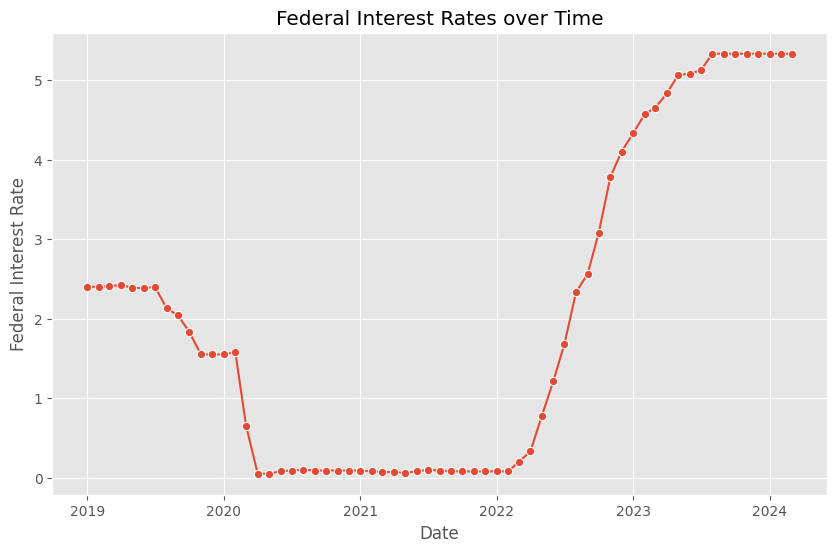

In [25]:
# Plotting Interest Rates over Time 
plt.figure(figsize=(10, 6))
sns.lineplot(x='DATE', y='FEDFUNDS', data=fed_rates, marker='o') 
plt.title('Federal Interest Rates over Time')
plt.xlabel('Date')
plt.ylabel('Federal Interest Rate')
plt.grid(True)
plt.show()

# EDA - Compustat (Daily)

In [38]:
funda_daily['datadate'] = pd.to_datetime(funda_daily['datadate'])

In [26]:
# Pull in columns from Assignment 1 and 2

In [39]:
# plotting stock price change (closing price) over time

funda_daily_price = funda_daily[['datadate','conm', 'tic', 'prcod', 'prcld', 'prchd', 'prccd']]

In [40]:
funda_daily_meta = funda_daily_price[funda_daily_price['tic'] == "META"].reset_index(drop = True)

In [41]:
funda_daily_meta.dtypes

datadate    datetime64[ns]
conm                object
tic                 object
prcod              float64
prcld              float64
prchd              float64
prccd              float64
dtype: object

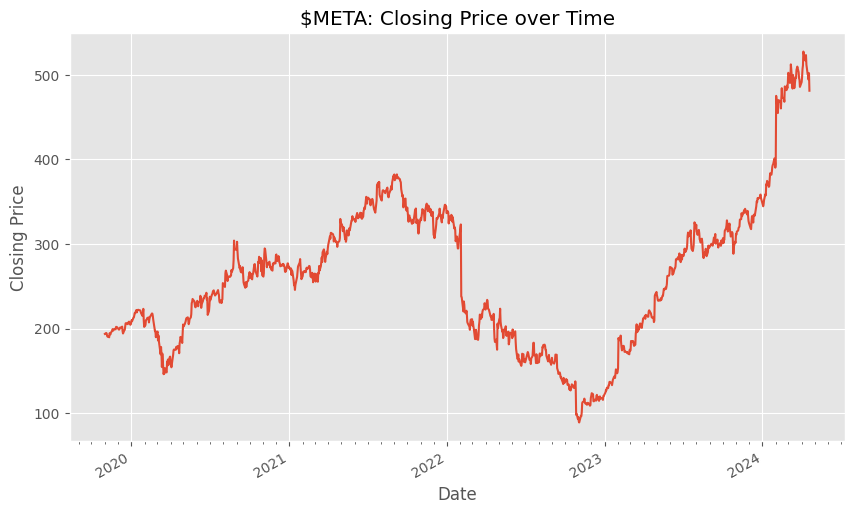

In [45]:
# Plotting Closing Price of Meta Stock over Time
plt.figure(figsize=(10, 6))
sns.lineplot(x='datadate', y='prccd', data=funda_daily_meta) 
plt.title('$META: Closing Price over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')

# Set the date format for the x-axis and configure the locator to pick the first day of each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Add a grid for better readability
plt.grid(True)

# Display the plot
plt.show()

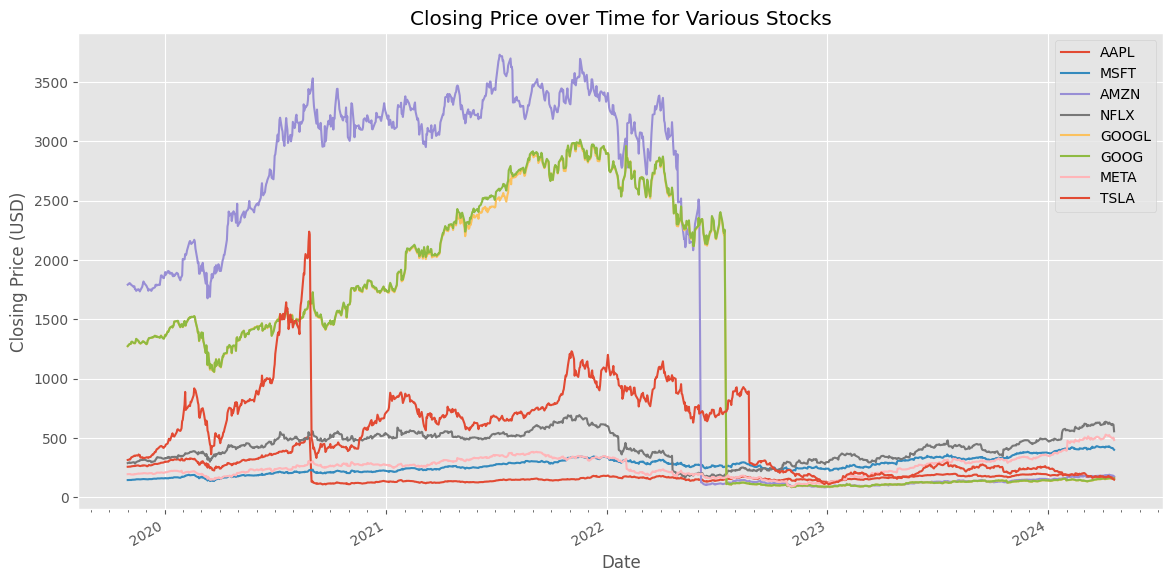

In [47]:
# Plotting FAANG stock over time

plt.figure(figsize=(14, 7))


for ticker in funda_daily_price['tic'].unique():
    
    ticker_data = funda_daily_price[funda_daily_price['tic'] == ticker]
    # Plot the line plot for the ticker
    sns.lineplot(x='datadate', y='prccd', data=ticker_data, label=ticker)

plt.title('Closing Price over Time for Various Stocks')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.gcf().autofmt_xdate()

# Add a legend
plt.legend()

# Add grid
plt.grid(True)

# Show the plot
plt.show()


# EDA - Compustat (Quarterly)

In [31]:
# Pull in columns from Assignment 1 and 2

# EDA - Compustat (Annual)

In [32]:
# Pull in columns from Assignment 1 and 2